In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [4]:
df = pd.read_csv('data/Credit Score Classification Dataset.csv')
df = df.drop('Gender', axis=1)
df

,Age,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,50000,Bachelor's Degree,Single,0,Rented,High
1,30,100000,Master's Degree,Married,2,Owned,High
2,35,75000,Doctorate,Married,1,Owned,High
3,40,125000,High School Diploma,Single,0,Owned,High
4,45,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...
159,29,27500,High School Diploma,Single,0,Rented,Low
160,34,47500,Associate's Degree,Single,0,Rented,Average
161,39,62500,Bachelor's Degree,Married,2,Owned,High
162,44,87500,Master's Degree,Single,0,Owned,High


In [5]:
print("Total categories in the feature Education:\n", df["Education"].value_counts(),"\n")

print("Total categories in the feature Marital_Status:\n", df["Marital Status"].value_counts(), "\n")

print("Total categories in the feature Home Ownership:\n", df["Home Ownership"].value_counts(), "\n")

print("Total categories in the feature Credit Score:\n", df["Credit Score"].value_counts(), "\n")

Total categories in the feature Education:
 Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64 

Total categories in the feature Marital_Status:
 Marital Status
Married    87
Single     77
Name: count, dtype: int64 

Total categories in the feature Home Ownership:
 Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64 

Total categories in the feature Credit Score:
 Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64 



In [6]:
df["Education"]= df["Education"].replace({"High School Diploma":"Undergraduate","Associate's Degree":"Undergraduate", "Bachelor's Degree":"Graduate", "Master's Degree":"Postgraduate", "Doctorate":"Postgraduate"})

In [8]:
df

,Age,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,50000,Graduate,Single,0,Rented,High
1,30,100000,Postgraduate,Married,2,Owned,High
2,35,75000,Postgraduate,Married,1,Owned,High
3,40,125000,Undergraduate,Single,0,Owned,High
4,45,100000,Graduate,Married,3,Owned,High
...,...,...,...,...,...,...,...
159,29,27500,Undergraduate,Single,0,Rented,Low
160,34,47500,Undergraduate,Single,0,Rented,Average
161,39,62500,Graduate,Married,2,Owned,High
162,44,87500,Postgraduate,Single,0,Owned,High


In [10]:
def cat_to_num(x, num_dict):
    return num_dict[x]

ed_dict = {'Undergraduate': 1, "Graduate": 2, "Postgraduate": 3}
mar_dict = {'Single': 1, "Married": 2}
liv_dict = {'Rented': 1, "Owned": 2}
score_dict = {'High': 1, "Low": -1, "Average": -1}

df['Education'] = df.apply(lambda x: cat_to_num(x['Education'], ed_dict), axis =1)
df['Marital Status'] = df.apply(lambda x: cat_to_num(x['Marital Status'], mar_dict), axis =1)
df['Home Ownership'] = df.apply(lambda x: cat_to_num(x['Home Ownership'], liv_dict), axis =1)
df['Credit Score'] = df.apply(lambda x: cat_to_num(x['Credit Score'], score_dict), axis =1)

df['Age'] = (df['Age']-df['Age'].min())/(df['Age'].max()-df['Age'].min())
df['Income'] = (df['Income']-df['Income'].min())/(df['Income'].max()-df['Income'].min())


In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

data = df.dropna()
X = np.array(data.drop('Credit Score', axis=1))
y = np.array(data['Credit Score'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=False)
reg = SVC().fit(X_train, y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.82      0.82      0.82        11
           1       0.91      0.91      0.91        22

    accuracy                           0.88        33
   macro avg       0.86      0.86      0.86        33
weighted avg       0.88      0.88      0.88        33



In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(), X, y, scoring='f1').mean()

0.9820202020202021


--------------------------------------------------------------
|                      Task Description                      |
--------------------------------------------------------------
|                  dimension:  2                             |
|                     bounds:  [[1.0, 6.0], [-7.0, -3.0]]    |
|   objective-function count:  1                             |
|  constraint-function count:  0                             |
--------------------------------------------------------------
|                     Method Parameters                      |
--------------------------------------------------------------
|                        eps:  0.01                          |
|                          r:  3.0                           |
|                      eps_r:  0.01                          |
|                iters_limit:  100                           |
|  number_of_parallel_points:  1                             |
------------------------------------------------------

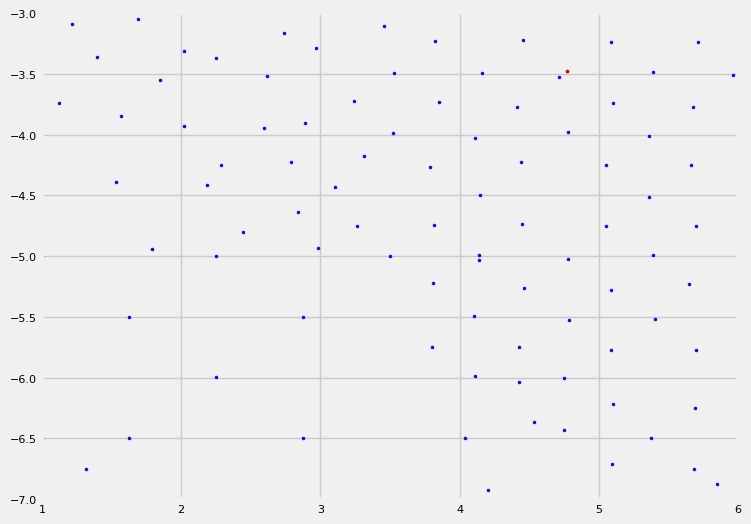

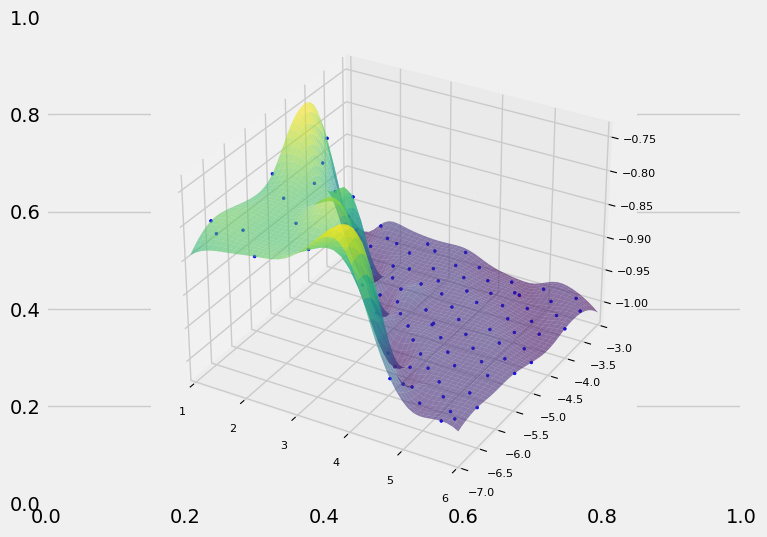

--------------------------------------------------------------
|                           Result                           |
--------------------------------------------------------------
|     global iteration count:  100                           |
|      local iteration count:  0                             |
|               solving time:  23.935073                     |
|             solution point:  [ 4.77197266 -3.47851562]     |
|             solution value:  -0.99111111                   |
|                   accuracy:  0.06250000                    |
--------------------------------------------------------------


In [13]:
from iOpt.output_system.listeners.static_painters import StaticPainterNDListener
from iOpt.output_system.listeners.animate_painters import AnimatePainterNDListener
from iOpt.output_system.listeners.console_outputers import ConsoleOutputListener

from iOpt.solver import Solver
from iOpt.solver_parametrs import SolverParameters
from examples.Machine_learning.SVC._2D.Problems import SVC_2d
import numpy as np

regularization_value_bound = {'low': 1, 'up': 6}
kernel_coefficient_bound = {'low': -7, 'up': -3}

problem = SVC_2d.SVC_2D(X, y, regularization_value_bound, kernel_coefficient_bound)

method_params = SolverParameters(r=np.double(3.0), iters_limit=100)
solver = Solver(problem, parameters=method_params)

apl = AnimatePainterNDListener("svc2d_anim.png", "output", vars_indxs=[0, 1], to_paint_obj_func=False)
solver.add_listener(apl)

spl = StaticPainterNDListener("svc2d_stat.png", "output", vars_indxs=[0, 1], mode="surface", calc="interpolation")
solver.add_listener(spl)

cfol = ConsoleOutputListener(mode='full')
solver.add_listener(cfol)

solver_info = solver.solve()